## Regression Models

In [38]:
import pandas as pd #Importing pandas library
import numpy as np #Importing numpy library
import matplotlib.pyplot as plt #Importing Matplotlib library's "pyplot"
import seaborn as sns  # Imorting Seaborn library
import os
from sklearn import metrics

data = pd.read_csv("MRI_scans.csv")
data

,S.No,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent.2,eTIV.1,Age,dataset
0,1,22916.9,982.7,15196.7,55796.4,6855.5,2956.4,4240.7,2223.9,2034.4,...,2.408,2.629,3.519,2.009,2.825,2.33635,1093846,1619602.965,85,1
1,2,22953.2,984.5,15289.7,55778.6,6835.1,3064.2,4498.6,2354.1,1927.1,...,2.417,2.640,3.488,2.111,2.720,2.34202,1099876,1624755.130,85,1
2,3,23320.4,1062.1,15382.1,55551.2,7566.0,3231.7,4456.2,1995.4,2064.7,...,2.374,2.601,3.342,2.146,2.684,2.31982,1097999,1622609.518,86,1
3,4,24360.0,1000.5,14805.4,54041.8,8004.6,3137.3,4262.2,1983.4,2017.7,...,2.366,2.639,3.361,2.056,2.700,2.29215,1070117,1583854.236,87,1
4,5,25769.4,1124.4,16331.1,54108.6,6677.4,2964.4,4204.6,2409.7,2251.8,...,2.381,2.555,3.450,2.052,2.574,2.30397,1075926,1617375.362,89,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4221,4222,27065.6,532.4,12425.1,51042.9,6354.8,3822.6,4490.5,2019.4,1256.2,...,2.505,2.666,2.915,2.243,2.683,2.29264,1108782,1561822.106,79,9
4222,4223,28408.8,912.7,14024.8,43103.5,6060.7,3114.2,3731.0,1937.4,1669.9,...,2.385,3.008,3.572,2.040,2.866,2.30156,960586,1530179.480,79,9
4223,4224,34467.9,1659.6,12744.5,54924.8,6256.7,3573.4,3526.6,2189.9,3063.1,...,2.028,2.995,3.706,1.928,2.610,2.19622,1033357,1604323.353,84,9
4224,4225,31627.5,1334.4,15883.2,57148.2,6982.4,4475.8,4464.4,2317.8,3809.0,...,2.491,2.865,3.456,2.317,2.900,2.43580,1073339,1620891.799,80,9


In [2]:
del data['S.No']
#del data['5th-Ventricle']
#del data['Left-WM-hypointensities']
#del data['Right-WM-hypointensities']
#del data['non-WM-hypointensities']
#del data['Left-non-WM-hypointensities']
#del data['Right-non-WM-hypointensities']
#del data['dataset']


In [3]:
X = data.iloc[:, 2:13]#'Age', axis=1)
y = data['Age']

In [4]:
#splitting testing and training data
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN Model

In [5]:
#implementing model
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors=8)
KNN.fit(x_train, y_train)
y_pred_KNN=KNN.predict(x_test)

In [6]:
#training score
KNN.score(x_train, y_train)*100

78.74640043034448

In [7]:
#testing score
KNN.score(x_test, y_test)*100

74.86373929550882

In [8]:
variance_KNN = metrics.explained_variance_score(y_test, y_pred_KNN)
r_squared_KNN = metrics.r2_score(y_test, y_pred_KNN)
meansquared_KNN = metrics.mean_squared_error(y_test, y_pred_KNN)
print("The KNN model's explained variance:", variance_KNN)
print("The KNN model's r^2 value is:", r_squared_KNN)
print("The KNN model's root-mean-square deviation:", meansquared_KNN)

The KNN model's explained variance: 0.7487402311302362
The KNN model's r^2 value is: 0.7486373929550882
The KNN model's root-mean-square deviation: 103.099179964539


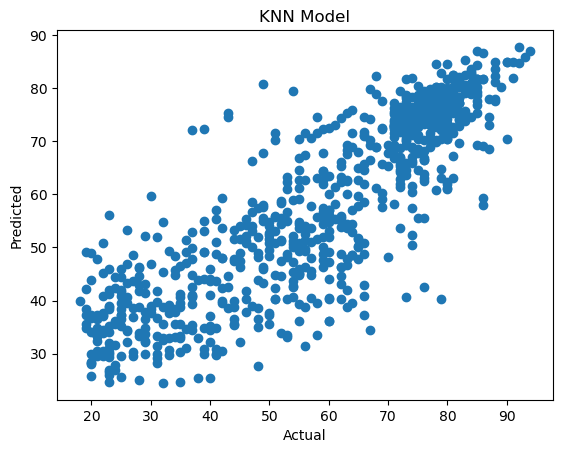

In [9]:
plt.scatter(y_test, y_pred_KNN)
plt.title("KNN Model")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [10]:
pred_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred_KNN, 'Difference': y_test-y_pred_KNN})
print(pred_df)

      Actual Value  Predicted Value  Difference
1612            80           70.500       9.500
2726            58           63.125      -5.125
2242            86           58.000      28.000
4130            78           70.250       7.750
3973            68           78.875     -10.875
...            ...              ...         ...
907             71           69.000       2.000
80              85           77.500       7.500
257             76           77.125      -1.125
295             82           74.000       8.000
1593            74           50.375      23.625

[846 rows x 3 columns]


# Passive Agressive Model

In [11]:
#implementing model
from sklearn.linear_model import PassiveAggressiveRegressor
model = PassiveAggressiveRegressor()
model.fit(x_train, y_train)
y_pred_PAR = model.predict(x_test)

In [12]:
#training score
model.score(x_train, y_train)*100

7.8278465852056005

In [13]:
#testing score
model.score(x_test, y_test)*100

6.346970835408361

In [21]:
variance_PAR = metrics.explained_variance_score(y_test, y_pred_PAR)
r_squared_PAR = metrics.r2_score(y_test, y_pred_PAR)
meansquared_PAR = metrics.mean_squared_error(y_test, y_pred_PAR)
print("The Passive Agressive model's explained variance:", variance_PAR)
print("The Passive Agressive model's r^2 value is:", r_squared_PAR)
print("The Passive Agressive model's root-mean-square deviation:", meansquared_PAR)

The Passive Agressive model's explained variance: 0.4049933688211602
The Passive Agressive model's r^2 value is: 0.06346970835408361
The Passive Agressive model's root-mean-square deviation: 384.1283563047732


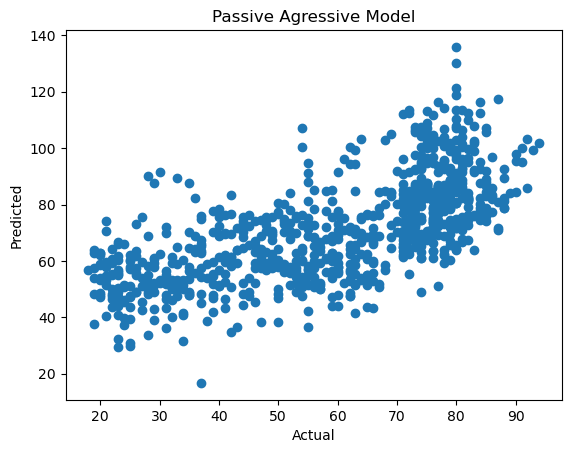

In [15]:
plt.scatter(y_test, y_pred_PAR)
plt.title("Passive Agressive Model")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

# Support Vector Machine

In [24]:
#implementing model
from sklearn import svm
SVR = svm.SVR()
SVR.fit(x_train, y_train)
y_pred_SVR = SVR.predict(x_test)

In [25]:
#training score
SVR.score(x_train, y_train)*100

36.14510244767521

In [26]:
#testing score
SVR.score(x_test, y_test)*100

36.39278207244663

In [27]:
variance_SVR = metrics.explained_variance_score(y_test, y_pred_SVR)
r_squared_SVR = metrics.r2_score(y_test, y_pred_SVR)
meansquared_SVR = metrics.mean_squared_error(y_test, y_pred_SVR)
print("The Support Vector Machine model's explained variance:", variance_SVR)
print("The Support Vector Machine model's r^2 value is:", r_squared_SVR)
print("The Support Vector Machine model's root-mean-square deviation:", meansquared_SVR)

The Support Vector Machine model's explained variance: 0.36869926536217457
The Support Vector Machine model's r^2 value is: 0.3639278207244663
The Support Vector Machine model's root-mean-square deviation: 260.8921066364006


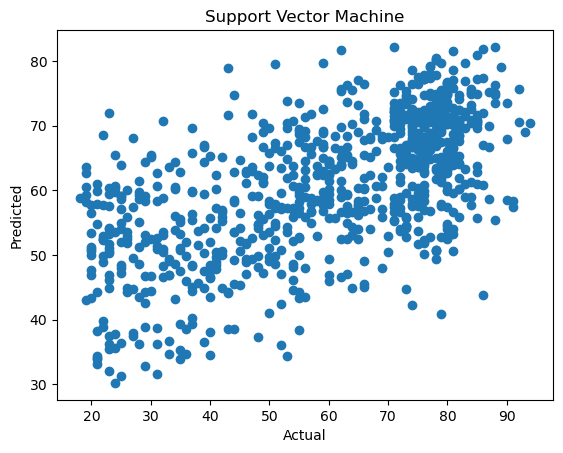

In [28]:
plt.scatter(y_test, y_pred_SVR)
plt.title("Support Vector Machine")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()